# Project 0: Inaugural Project

**Name:** Jana Ucnova (pvw581) // Spring semester 2020

## Labor Supply Problem

Consider a consumer solving the following maximization problem
$$ c^*, \: l^* = \arg \mathop{\max}_{c, \: l} \log (c) + \nu \frac{l^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}  $$
s.t.
$$
x = m + wl - \left[ \tau_0wl + \tau_1 \max \{ wl-\kappa,0 \} \right] 
$$
$$
c \in \left[0, x \right]
$$
$$
l \in \left[0, 1 \right]
$$
where $c$ is consumption, $l$ is labor supply, $m$ is cash-on-hand, $w$ is the wage rate, $\tau_0$ is the
standard labor income tax, $\tau_1$ is the top bracket labor income tax, $\kappa$ is the cut-off for the top
labor income bracket, $x$ is total resources, $\nu$ scales the disutility of labor, and $\epsilon$ is the Frisch
elasticity of labor supply. 


Note that utility is monotonically increasing in consumption. This implies that
$$ c^* = x$$

### Questions
Firstly, we will import modules that we need for solving the assignment.

In [1]:
import numpy as np # import the numpy module
import math # import math module
from scipy import optimize
import matplotlib.pyplot as plt # import the matplotlib module

#### Question 1
Construct a function which solves maxizing equation given the parameters. We choose the following parameter values:
$$
m = 1, \: \nu = 10, \: \epsilon = 0.3, \: \tau_0 = 0.4, \: \tau_1 = 0.1, \: \kappa=0.4
$$

We set given parameters.

In [2]:
m = 1
nu = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

We define utility function:

In [3]:
def u_function(c,l,nu,epsilon):
    if c > 0:
        utility = math.log(c) - nu*(l**(1+1/epsilon))/(1+1/epsilon)
    else:
        utility = - np.inf
    return utility

Then we define function that solves maximization problem. This function uses loops to solve the problem.

In [4]:
def find_best_choice(w,R,tau0,tau1,kappa,m,nu,epsilon):
    # where R is number of possible solutions we will loop through
    
    # allocate numpy arrays
    shape_tuple = (R)
    c_values = np.empty(shape_tuple)
    l_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # start from guess
    l_best = 0
    c_best = 0 # cannot put 0 into the logarithm
    u_best = u_function(c_best,l_best,nu=nu,epsilon=epsilon)

    
    # loop through all possibilities
    for i in range(R):
        
        # i. labor l
        l_values[i] = l = i/(R-1)
        
        # ii. implied consumption c
        c_values[i] = c = m+ w*l - (tau0*w*l + tau1 * max([w*l-kappa,0]))
            
        # iii. utility u 
        u_values[i] = u_function(c,l,nu=nu,epsilon=epsilon)
        
        if u_values[i] >= u_best:    
            l_best = l_values[i]
            c_best = c_values[i] 
            u_best = u_values[i]  
    # obtain optimal consumption, labor and utility
    return c_best,l_best,u_best

#### Question 2
Plot $l^*$ and $c^*$ as functions of $w$ in the range $0.5$ to $1.5$. Consider a population with $N=10,000$ individuals indexed by $i$. Assume the distribution of wages is uniform such that
$$
w_i \sim U(0.5,1.5)
$$
Denote the optimal choice of individual $i$ by $l_i^*$ and $c_i^*$.

We use the function defined in question 1 to obtain the optimal choice of consumption and labor for each individual i.

In [5]:
# loop trough grid of R solutions
R = 500
# consider 10,000 individuals
N = 10000
# choose random seed
np.random.seed(2020)
# uniformly distributed wages
w_low = 0.5 # lower bound
w_high = 1.5 # upper bound
W = np.random.uniform(low=w_low,high=w_high,size=N)
W = sorted(W) # sort wages

# allocate numpy arrays for consumption, labor and utility
c = np.empty(N)
l = np.empty(N)
u = np.empty(N)

# denote optimal choice of individual i
for i in range(N):
    w = W[i]
    c[i], l[i], u[i] = find_best_choice(w,R,tau0,tau1,kappa,m,nu,epsilon)

Now, we plot $l^*_i$ and $c^*_i$ as a function of $w$.

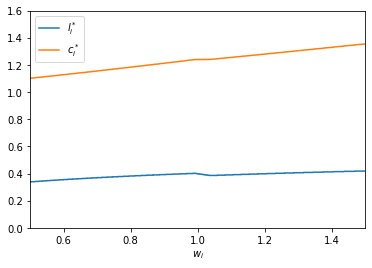

In [6]:
# plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(W,l,label='$l^*_i$')
ax.plot(W,c,label='$c^*_i$')
ax.set_xlim([0.5,1.5])
ax.set_ylim([0,1.6])
ax.set_xlabel('$w_i$')
ax.legend(loc='upper left');

#### Question 3
Calculate the total tax revenue given by
$$
T = \sum_{i=1}^{N} \left[ \tau_0 w_i l_i^* + \tau_1 \max \{ w_i l_i^* - \kappa,0 \} \right]
$$

In [7]:
# allocate numpy array
t = np.empty(N)
# loop over N individuals
for i in range(N):
    t[i] = tau0*W[i]*l[i] + tau1*max([W[i]*l[i]-kappa,0])
# obtain total tax revenue
T = sum(t)
print(f'Total tax revenue:: {T:.4f}')

Total tax revenue:: 1621.3208


#### Question 4
What would the tax revenue be if instead $\epsilon = 0.1$?

In [8]:
# define new epsilon
epsilon_new = 0.1
# allocate numpy arrays for consumption, labor and utility
c_new = np.empty(N)
l_new = np.empty(N)
u_new = np.empty(N)

# denote omptimal choice of individual i
for i in range(N):
    w = W[i]
    c_new[i], l_new[i], u_new[i] = find_best_choice(w,R,tau0,tau1,kappa,m,nu,epsilon_new)

# allocate numpy array
t_new = np.empty(N)
# loop over N individuals
for i in range(N):
    t_new[i] = tau0*W[i]*l_new[i] + tau1*max([W[i]*l_new[i]-kappa,0])
# obtain total tax revenue
T_new = sum(t_new)
print(f'New total tax revenue: {T_new:.4f}')

New total tax revenue: 3181.1007


Consider a politician who wishes to maximize the tax revenue.

#### Question 5
Which $\tau_0$, $\tau_1$ and $\kappa$ would you suggest her to implement? Report the tax revenue you expect to obtain.

In [9]:
# Define function to obtain total tax revenue
def total_tax_revenue(x,N,W,l):
    # define parameters
    tau0_optimal = x[0]
    tau1_optimal = x[1]
    kappa_optimal = x[2]

    # allocate numpy array
    t = np.empty(N)

    # loop through N individuals
    for i in range(N):
        t[i] = tau0_optimal*W[i]*l[i] + tau1_optimal*max([W[i]*l[i]-kappa_optimal,0])
    # total tax revenue
    T = sum(t)
    return -T

In [10]:
# Use solver to obtain tau0, tau1 and kappa that should be implemented to maximize the tax revenue
# set initial guess
initial_guess = [0,0,0]
# set bounds for parameters
bounds = bounds = ((0,1),(0,1),(0,1))
# solve minimization problem
sol = optimize.minimize(total_tax_revenue,initial_guess,args=(N,W,l),method='SLSQP',bounds=bounds)

# Obtain parameters
tau0_best = sol.x[0]
tau1_best = sol.x[1]
kappa_best = sol.x[2]
# Obtain the tax revenue
T_best = -total_tax_revenue([tau0_best,tau1_best,kappa_best],N,W,l)
# Print solution
print(f'tau0: {tau0_best:.2f}, tau1: {tau1_best:.2f}, kappa: {kappa_best:.2f} -> Tax revenue: {T_best:.3f}') 

tau0: 1.00, tau1: 1.00, kappa: 0.00 -> Tax revenue: 7848.507
